In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score


In [2]:

from google.colab import files

# Upload dataset file to Google Colab
uploaded = files.upload()

Saving exasens.zip to exasens.zip


In [3]:
# Read the dataset into a Pandas DataFrame
exasens_df = pd.read_csv('exasens.zip')


In [4]:

# Display the first few rows of the DataFrame
print(exasens_df.head())



  Diagnosis     ID Imaginary Part    Unnamed: 3 Real Part    Unnamed: 5  \
0       NaN    NaN            NaN           NaN       NaN           NaN   
1       NaN    NaN           Min          Avg.       Min          Avg.    
2      COPD  301-4        -320.61  -300.5635307   -495.26  -464.1719907   
3      COPD  302-3        -325.39  -314.7503595   -473.73  -469.2631404   
4      COPD  303-3           -323  -317.4360556   -476.12  -471.8976667   

   Gender   Age  Smoking  Unnamed: 9  Unnamed: 10 Unnamed: 11      Unnamed: 12  
0     NaN   NaN      NaN         NaN          NaN         NaN              NaN  
1     NaN   NaN      NaN         NaN          NaN     Gender           Somking  
2     1.0  77.0      2.0         NaN          NaN      Male=1     Non-smoker=1  
3     0.0  72.0      2.0         NaN          NaN    Female=0      Ex-smoker=2  
4     1.0  73.0      3.0         NaN          NaN         NaN  Active-smoker=3  


In [5]:

# Check for missing values
print(exasens_df.isnull().sum())


Diagnosis           2
ID                  2
Imaginary Part    300
Unnamed: 3        300
Real Part         300
Unnamed: 5        300
Gender              2
Age                 2
Smoking             2
Unnamed: 9        401
Unnamed: 10       401
Unnamed: 11       398
Unnamed: 12       397
dtype: int64


In [6]:

# Perform basic data exploration
print(exasens_df.info())
print(exasens_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401 entries, 0 to 400
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Diagnosis       399 non-null    object 
 1   ID              399 non-null    object 
 2   Imaginary Part  101 non-null    object 
 3   Unnamed: 3      101 non-null    object 
 4   Real Part       101 non-null    object 
 5   Unnamed: 5      101 non-null    object 
 6   Gender          399 non-null    float64
 7   Age             399 non-null    float64
 8   Smoking         399 non-null    float64
 9   Unnamed: 9      0 non-null      float64
 10  Unnamed: 10     0 non-null      float64
 11  Unnamed: 11     3 non-null      object 
 12  Unnamed: 12     4 non-null      object 
dtypes: float64(5), object(8)
memory usage: 40.9+ KB
None
           Gender         Age     Smoking  Unnamed: 9  Unnamed: 10
count  399.000000  399.000000  399.000000         0.0          0.0
mean     0.398496   48.73684

In [7]:
# Drop columns with no useful information
exasens_df = exasens_df.drop(columns=['Unnamed: 9', 'Unnamed: 10'])

# Display unique values in columns "Unnamed: 11" and "Unnamed: 12"
print("Unique values in Unnamed: 11:", exasens_df["Unnamed: 11"].unique())
print("Unique values in Unnamed: 12:", exasens_df["Unnamed: 12"].unique())


Unique values in Unnamed: 11: [nan 'Gender ' 'Male=1' 'Female=0']
Unique values in Unnamed: 12: [nan 'Somking' 'Non-smoker=1' 'Ex-smoker=2' 'Active-smoker=3']


In [8]:
# Map values in column "Unnamed: 11" to meaningful labels
exasens_df["Gender"] = exasens_df["Unnamed: 11"].map({"Male=1": "Male", "Female=0": "Female"})

# Map values in column "Unnamed: 12" to meaningful labels
exasens_df["Smoking Status"] = exasens_df["Unnamed: 12"].map({"Non-smoker=1": "Non-smoker",
                                                             "Ex-smoker=2": "Ex-smoker",
                                                             "Active-smoker=3": "Active-smoker"})

# Drop the original columns "Unnamed: 11" and "Unnamed: 12"
exasens_df = exasens_df.drop(columns=["Unnamed: 11", "Unnamed: 12"])

# Display the updated DataFrame
print(exasens_df.head())


  Diagnosis     ID Imaginary Part    Unnamed: 3 Real Part    Unnamed: 5  \
0       NaN    NaN            NaN           NaN       NaN           NaN   
1       NaN    NaN           Min          Avg.       Min          Avg.    
2      COPD  301-4        -320.61  -300.5635307   -495.26  -464.1719907   
3      COPD  302-3        -325.39  -314.7503595   -473.73  -469.2631404   
4      COPD  303-3           -323  -317.4360556   -476.12  -471.8976667   

   Gender   Age  Smoking Smoking Status  
0     NaN   NaN      NaN            NaN  
1     NaN   NaN      NaN            NaN  
2    Male  77.0      2.0     Non-smoker  
3  Female  72.0      2.0      Ex-smoker  
4     NaN  73.0      3.0  Active-smoker  


In [9]:
# Drop the original column "Unnamed: 3"
exasens_df = exasens_df.drop(columns=["Unnamed: 3"])

# Handle missing values in the "Gender" and "Smoking Status" columns
exasens_df["Gender"] = exasens_df["Gender"].fillna("Unknown")
exasens_df["Smoking Status"] = exasens_df["Smoking Status"].fillna("Unknown")

# Display the updated DataFrame
print(exasens_df.head())


  Diagnosis     ID Imaginary Part Real Part    Unnamed: 5   Gender   Age  \
0       NaN    NaN            NaN       NaN           NaN  Unknown   NaN   
1       NaN    NaN           Min       Min          Avg.   Unknown   NaN   
2      COPD  301-4        -320.61   -495.26  -464.1719907     Male  77.0   
3      COPD  302-3        -325.39   -473.73  -469.2631404   Female  72.0   
4      COPD  303-3           -323   -476.12  -471.8976667  Unknown  73.0   

   Smoking Smoking Status  
0      NaN        Unknown  
1      NaN        Unknown  
2      2.0     Non-smoker  
3      2.0      Ex-smoker  
4      3.0  Active-smoker  


In [10]:
num_columns = exasens_df.shape[1]
print("Number of columns in the DataFrame:", num_columns)


Number of columns in the DataFrame: 9


In [11]:
# Select relevant columns for clustering
data = exasens_df[['Imaginary Part', 'Real Part', 'Age', 'Smoking']]

# Drop rows with any missing values
data = data.dropna()

# Display the first few rows of the data
print(data.head())


  Imaginary Part Real Part   Age  Smoking
2        -320.61   -495.26  77.0      2.0
3        -325.39   -473.73  72.0      2.0
4           -323   -476.12  73.0      3.0
5        -327.78   -473.73  76.0      2.0
6        -325.39   -478.52  65.0      2.0


In [12]:
#case 1

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt

# Perform K-means clustering for different values of clusters
cluster_values = [3, 4, 5]
results = []

for c in cluster_values:
    kmeans = KMeans(n_clusters=c, random_state=42)
    cluster_labels = kmeans.fit_predict(data)

    # Evaluate clustering performance
    silhouette = silhouette_score(data, cluster_labels)
    calinski_harabasz = calinski_harabasz_score(data, cluster_labels)
    davies_bouldin = davies_bouldin_score(data, cluster_labels)

    results.append({'Clusters': c,
                    'Silhouette Score': silhouette,
                    'Calinski-Harabasz Score': calinski_harabasz,
                    'Davies-Bouldin Index': davies_bouldin})

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display the results
print(results_df)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


   Clusters  Silhouette Score  Calinski-Harabasz Score  Davies-Bouldin Index
0         3          0.680995               158.228798              0.316658
1         4          0.448784               169.876331              0.629278
2         5          0.480820               220.840827              0.550155


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

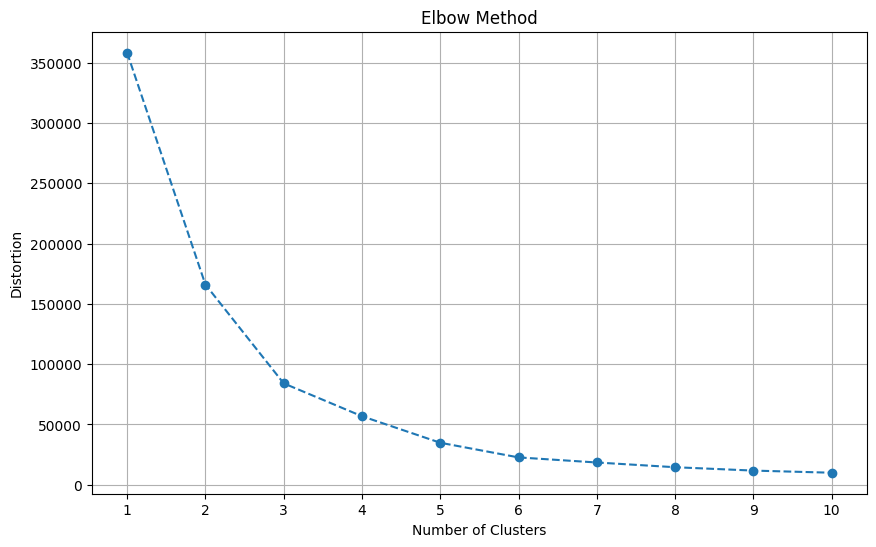

In [13]:
distortions = []
for c in range(1, 11):
    kmeans = KMeans(n_clusters=c, random_state=42)
    kmeans.fit(data)
    distortions.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), distortions, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


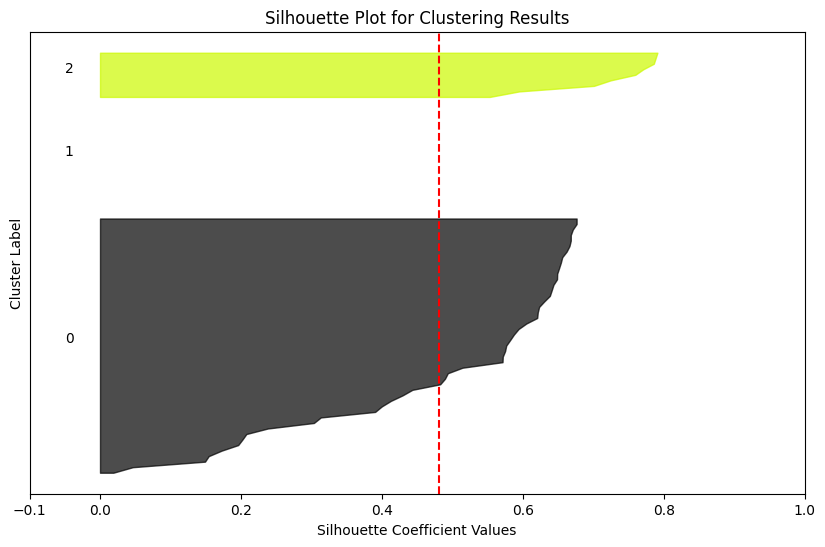

In [14]:
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

# Plot silhouette plot
plt.figure(figsize=(10, 6))
plt.title("Silhouette Plot for Clustering Results")
plt.xlabel("Silhouette Coefficient Values")
plt.ylabel("Cluster Label")

# Compute silhouette scores for each sample
silhouette_vals = silhouette_samples(data, cluster_labels)

y_lower = 10
for i in range(len(cluster_values)):
    cluster_silhouette_vals = silhouette_vals[cluster_labels == i]
    cluster_silhouette_vals.sort()

    size_cluster_i = cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / len(cluster_values))
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_vals, facecolor=color, edgecolor=color, alpha=0.7)

    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

plt.axvline(x=silhouette, color="red", linestyle="--")
plt.yticks([])
plt.xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
plt.show()


In [15]:
#case 2

# Create a deep copy of the original data
data_normalized = data.copy()

# Initialize StandardScaler
scaler = StandardScaler()

# Modify the copy for normalization
data_normalized[['Imaginary Part', 'Real Part', 'Age', 'Smoking']] = scaler.fit_transform(data_normalized[['Imaginary Part', 'Real Part', 'Age', 'Smoking']])

# Display the first few rows of the normalized data
print(data_normalized.head())


   Imaginary Part  Real Part       Age   Smoking
2       -0.200429  -0.456438  1.239927  0.373718
3       -0.369452  -0.014925  0.991345  0.373718
4       -0.284941  -0.063936  1.041062  1.868588
5       -0.453963  -0.014925  1.190211  0.373718
6       -0.369452  -0.113153  0.643330  0.373718


In [16]:
#case 2

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Define the cluster values to try
cluster_values = [3, 4, 5]

# Initialize lists to store evaluation scores
silhouette_scores = []
calinski_harabasz_scores = []
davies_bouldin_scores = []

# Perform KMeans clustering for different numbers of clusters
for c in cluster_values:
    # Initialize KMeans with the current number of clusters
    kmeans = KMeans(n_clusters=c, random_state=42)

    # Fit KMeans to the normalized data
    cluster_labels = kmeans.fit_predict(data_normalized)

    # Compute silhouette score
    silhouette = silhouette_score(data_normalized, cluster_labels)
    silhouette_scores.append(silhouette)

    # Compute Calinski-Harabasz score
    calinski_harabasz = calinski_harabasz_score(data_normalized, cluster_labels)
    calinski_harabasz_scores.append(calinski_harabasz)

    # Compute Davies-Bouldin index
    davies_bouldin = davies_bouldin_score(data_normalized, cluster_labels)
    davies_bouldin_scores.append(davies_bouldin)
# Display the evaluation scores as a table
print("\nClusters\tSilhouette Score\tCalinski-Harabasz Score\t\tDavies-Bouldin Index")
for i, c in enumerate(cluster_values):
    print(f"{c}\t\t{silhouette_scores[i]:.5f}\t\t\t{calinski_harabasz_scores[i]:.5f}\t\t\t{davies_bouldin_scores[i]:.5f}")

print("\n")




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



Clusters	Silhouette Score	Calinski-Harabasz Score		Davies-Bouldin Index
3		0.49365			65.23070			0.80601
4		0.51093			85.54102			0.58074
5		0.51328			95.96895			0.57986




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [17]:
# Display the evaluation scores as a table (transposed)
print("\t".join(["Clusters"] + [str(c) for c in cluster_values]))
print("Silhouette Score\t" + "\t\t".join([f"{score:.5f}" for score in silhouette_scores]))
print("Calinski-Harabasz Score\t" + "\t".join([f"{score:.5f}" for score in calinski_harabasz_scores]))
print("Davies-Bouldin Index\t" + "\t".join([f"{score:.5f}" for score in davies_bouldin_scores]))


Clusters	3	4	5
Silhouette Score	0.49365		0.51093		0.51328
Calinski-Harabasz Score	65.23070	85.54102	95.96895
Davies-Bouldin Index	0.80601	0.58074	0.57986


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

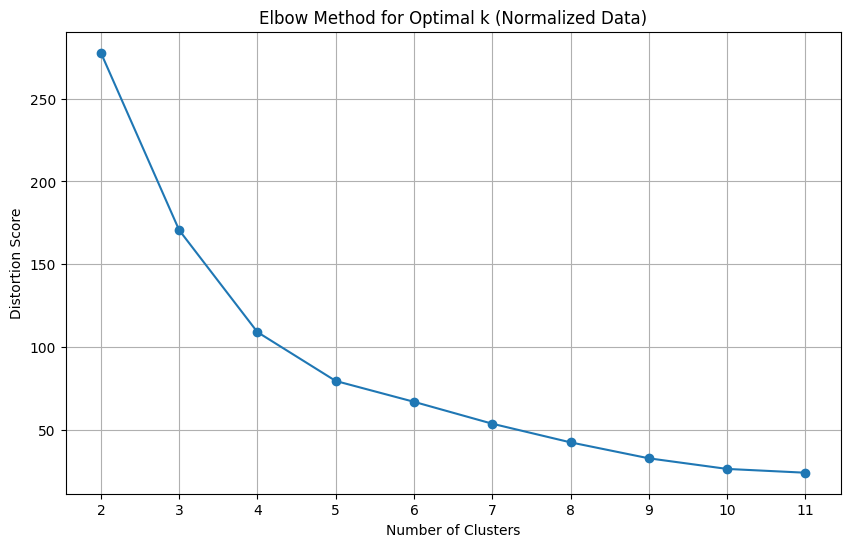

In [18]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Define the range of cluster values
cluster_values = range(2, 12)

# Initialize an empty list to store distortion scores
distortion_scores_normalized = []

# Iterate over each value of clusters
for c in cluster_values:
    # Initialize KMeans with the current number of clusters
    kmeans_normalized = KMeans(n_clusters=c, random_state=42)
    # Fit the model and compute distortion score
    kmeans_normalized.fit(data_normalized)
    distortion_scores_normalized.append(kmeans_normalized.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(cluster_values, distortion_scores_normalized, marker='o', linestyle='-')
plt.xticks(np.arange(2, 12, 1))  # Set x-ticks without a scale of 2
plt.title('Elbow Method for Optimal k (Normalized Data)')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion Score')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


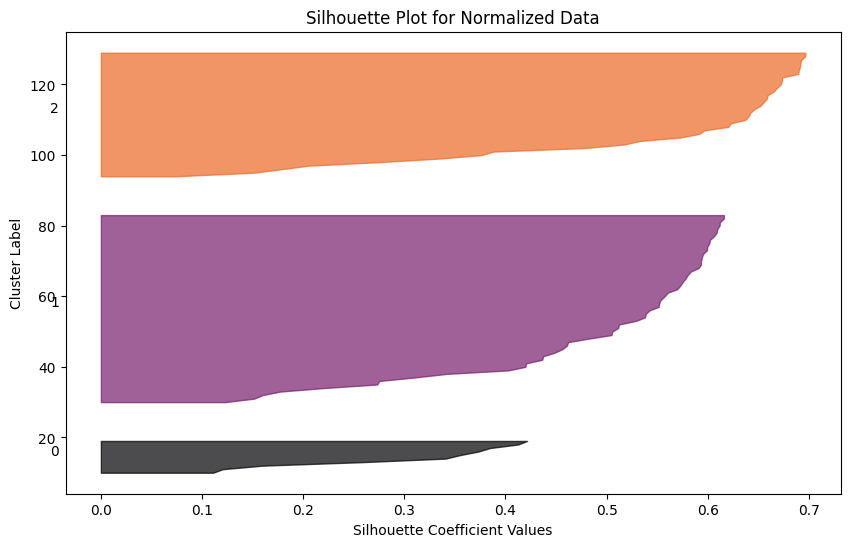

In [19]:
from sklearn.metrics import silhouette_samples

# Initialize KMeans with the desired number of clusters
kmeans_normalized = KMeans(n_clusters=3, random_state=42)
cluster_labels_normalized = kmeans_normalized.fit_predict(data_normalized)

# Compute silhouette scores
silhouette_vals_normalized = silhouette_samples(data_normalized, cluster_labels_normalized)

# Plot silhouette plot
plt.figure(figsize=(10, 6))

y_lower_normalized = 10
for i in range(3):
    # Aggregate silhouette scores for samples belonging to cluster i
    cluster_silhouette_vals_normalized = silhouette_vals_normalized[cluster_labels_normalized == i]
    cluster_silhouette_vals_normalized.sort()
    y_upper_normalized = y_lower_normalized + cluster_silhouette_vals_normalized.shape[0]

    # Fill color for clusters
    color = plt.cm.inferno(i / 3)
    plt.fill_betweenx(np.arange(y_lower_normalized, y_upper_normalized), 0, cluster_silhouette_vals_normalized, facecolor=color, edgecolor=color, alpha=0.7)

    # Label silhouette plots with cluster numbers
    plt.text(-0.05, y_lower_normalized + 0.5 * cluster_silhouette_vals_normalized.shape[0], str(i))

    # Compute new y_lower for the next plot
    y_lower_normalized = y_upper_normalized + 10

plt.title('Silhouette Plot for Normalized Data')
plt.xlabel('Silhouette Coefficient Values')
plt.ylabel('Cluster Label')
plt.show()


In [22]:
#case 3
from sklearn.manifold import TSNE

# Now you can use TSNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
data_transformed = tsne.fit_transform(data)

cluster_sizes = [3, 4, 5]  # Define the cluster sizes to test

# Perform KMeans clustering and compute evaluation scores for each cluster size
for n_clusters in cluster_sizes:
    # KMeans clustering with data transformation
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(data_transformed)

    # Compute evaluation scores
    silhouette_score_case3 = silhouette_score(data_transformed, labels)
    calinski_harabasz_score_case3 = calinski_harabasz_score(data_transformed, labels)
    davies_bouldin_score_case3 = davies_bouldin_score(data_transformed, labels)

    # Print evaluation scores
    print(f"Cluster Size: {n_clusters}")
    print("Silhouette Score:", silhouette_score_case3)
    print("Calinski-Harabasz Score:", calinski_harabasz_score_case3)
    print("Davies-Bouldin Score:", davies_bouldin_score_case3)
    print()


Cluster Size: 3
Silhouette Score: 0.53796804
Calinski-Harabasz Score: 151.92514084424025
Davies-Bouldin Score: 0.7763551488835008

Cluster Size: 4
Silhouette Score: 0.5527197
Calinski-Harabasz Score: 204.15734750925614
Davies-Bouldin Score: 0.6679575251030541

Cluster Size: 5
Silhouette Score: 0.6079404
Calinski-Harabasz Score: 278.8648076815171
Davies-Bouldin Score: 0.5236622905315731



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [23]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Define cluster sizes
cluster_sizes = [3, 4, 5]

# Perform KMeans clustering and compute evaluation scores for each cluster size
for n_clusters in cluster_sizes:
    # Apply PCA for dimensionality reduction
    pca = PCA(n_components=2, random_state=42)
    data_pca = pca.fit_transform(data)

    # KMeans clustering with PCA
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(data_pca)

    # Compute evaluation scores
    silhouette_score_case4 = silhouette_score(data_pca, labels)
    calinski_harabasz_score_case4 = calinski_harabasz_score(data_pca, labels)
    davies_bouldin_score_case4 = davies_bouldin_score(data_pca, labels)

    # Print evaluation scores
    print(f"Cluster Size: {n_clusters}")
    print("Silhouette Score:", silhouette_score_case4)
    print("Calinski-Harabasz Score:", calinski_harabasz_score_case4)
    print("Davies-Bouldin Score:", davies_bouldin_score_case4)
    print()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Size: 3
Silhouette Score: 0.803880554154936
Calinski-Harabasz Score: 286.0256700742083
Davies-Bouldin Score: 0.16348174949901995

Cluster Size: 4
Silhouette Score: 0.7001117242592083
Calinski-Harabasz Score: 424.6721888561158
Davies-Bouldin Score: 0.43431374693538055

Cluster Size: 5
Silhouette Score: 0.6919304135275811
Calinski-Harabasz Score: 750.363207557014
Davies-Bouldin Score: 0.3172915071443015



In [24]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

# Define cluster sizes
cluster_sizes = [3, 4, 5]

# Perform KMeans clustering and compute evaluation scores for each cluster size
for n_clusters in cluster_sizes:
    # Normalization
    scaler = StandardScaler()
    data_normalized = scaler.fit_transform(data)

    # Transformation (t-SNE)
    tsne = TSNE(n_components=2, random_state=42)
    data_transformed = tsne.fit_transform(data_normalized)

    # KMeans clustering with normalization and transformation
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(data_transformed)

    # Compute evaluation scores
    silhouette_score_case5 = silhouette_score(data_transformed, labels)
    calinski_harabasz_score_case5 = calinski_harabasz_score(data_transformed, labels)
    davies_bouldin_score_case5 = davies_bouldin_score(data_transformed, labels)

    # Print evaluation scores
    print(f"Cluster Size: {n_clusters}")
    print("Silhouette Score:", silhouette_score_case5)
    print("Calinski-Harabasz Score:", calinski_harabasz_score_case5)
    print("Davies-Bouldin Score:", davies_bouldin_score_case5)
    print()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Size: 3
Silhouette Score: 0.6312269
Calinski-Harabasz Score: 262.5028063063276
Davies-Bouldin Score: 0.42876812560352473



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Size: 4
Silhouette Score: 0.6384989
Calinski-Harabasz Score: 372.95694969470793
Davies-Bouldin Score: 0.540548469685177

Cluster Size: 5
Silhouette Score: 0.67511994
Calinski-Harabasz Score: 430.81582369604416
Davies-Bouldin Score: 0.4020903436516455



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [25]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Define cluster sizes
cluster_sizes = [3, 4, 5]

# Perform KMeans clustering and compute evaluation scores for each cluster size
for n_clusters in cluster_sizes:
    # Normalization
    scaler = StandardScaler()
    data_normalized = scaler.fit_transform(data)

    # Transformation (PCA)
    pca = PCA(n_components=2, random_state=42)
    data_pca = pca.fit_transform(data_normalized)

    # Transformation (t-SNE)
    tsne = TSNE(n_components=2, random_state=42)
    data_tsne = tsne.fit_transform(data_normalized)

    # Combine PCA and t-SNE transformed data
    data_combined = np.concatenate([data_pca, data_tsne], axis=1)

    # KMeans clustering with combined transformed data
    kmeans_combined = KMeans(n_clusters=n_clusters, random_state=42)
    labels_combined = kmeans_combined.fit_predict(data_combined)

    # Compute evaluation scores
    silhouette_score_case_combined = silhouette_score(data_combined, labels_combined)
    calinski_harabasz_score_case_combined = calinski_harabasz_score(data_combined, labels_combined)
    davies_bouldin_score_case_combined = davies_bouldin_score(data_combined, labels_combined)

    # Print evaluation scores
    print(f"Cluster Size: {n_clusters}")
    print("Evaluation Scores with Combined Transformed Data:")
    print("Silhouette Score:", silhouette_score_case_combined)
    print("Calinski-Harabasz Score:", calinski_harabasz_score_case_combined)
    print("Davies-Bouldin Score:", davies_bouldin_score_case_combined)
    print()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Size: 3
Evaluation Scores with Combined Transformed Data:
Silhouette Score: 0.651838159622138
Calinski-Harabasz Score: 242.60667138655472
Davies-Bouldin Score: 0.5174141419231583



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Size: 4
Evaluation Scores with Combined Transformed Data:
Silhouette Score: 0.6148634270179295
Calinski-Harabasz Score: 296.79391974790684
Davies-Bouldin Score: 0.6128917733278314

Cluster Size: 5
Evaluation Scores with Combined Transformed Data:
Silhouette Score: 0.6505715928660879
Calinski-Harabasz Score: 314.1963251313164
Davies-Bouldin Score: 0.4663296799365164



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
